# Task 2: Bitcoin Price Prediction

In [71]:
# Importing Libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
bs=pd.read_csv('BTC-2021min[1].csv')
bs

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143
...,...,...,...,...,...,...,...,...,...
610777,1609459500,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
610778,1609459440,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
610779,1609459380,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
610780,1609459320,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279


# Data Preprocessing

In [3]:
bs.shape

(610782, 9)

In [4]:
bs.size

5497038

In [5]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610782 entries, 0 to 610781
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        610782 non-null  int64  
 1   date        610782 non-null  object 
 2   symbol      610782 non-null  object 
 3   open        610782 non-null  float64
 4   high        610782 non-null  float64
 5   low         610782 non-null  float64
 6   close       610782 non-null  float64
 7   Volume BTC  610782 non-null  float64
 8   Volume USD  610782 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.9+ MB


In [6]:
bs.isnull().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [7]:
bs.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,6.107820e+05,610782.000000,610782.000000,610782.000000,610782.000000,610782.000000,6.107820e+05
mean,1.627783e+09,46482.265381,46509.783597,46454.085712,46482.567211,3.165254,1.389474e+05
std,1.057906e+07,9453.990285,9454.798088,9453.135638,9454.107853,7.893321,3.298068e+05
min,1.609459e+09,28093.810000,28397.520000,27734.000000,28073.030000,0.000000,0.000000e+00
25%,1.618621e+09,38129.052500,38157.882500,38099.437500,38129.137500,0.193192,8.859586e+03
50%,1.627783e+09,46666.960000,46697.745000,46636.710000,46667.295000,0.924971,4.190121e+04
75%,1.636944e+09,54907.797500,54938.655000,54877.405000,54907.412500,2.989888,1.349341e+05
max,1.646106e+09,69000.000000,69000.000000,68799.990000,69000.000000,398.565948,1.396792e+07


In [8]:
bs.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [9]:
bs.tail()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
610777,1609459500,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
610778,1609459440,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
610779,1609459380,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
610780,1609459320,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279
610781,1609459260,2021-01-01 00:01:00,BTC/USD,29007.31,29086.90,29007.31,29083.47,14.561951,423512.060397


In [10]:
bs.sample(10)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
403087,1621920900,2021-05-25 05:35:00,BTC/USD,38050.31,38052.97,37996.32,37996.32,2.125288,8.075313e+04
209466,1633538160,2021-10-06 16:36:00,BTC/USD,54528.44,54530.72,54477.46,54513.62,0.282988,1.542668e+04
577022,1611484800,2021-01-24 10:40:00,BTC/USD,32601.83,32613.12,32599.99,32599.99,0.745307,2.429699e+04
378315,1623407220,2021-06-11 10:27:00,BTC/USD,37450.05,37450.05,37400.05,37409.86,52.338171,1.957964e+06
445632,1619368200,2021-04-25 16:30:00,BTC/USD,50232.68,50246.42,50229.66,50229.66,0.311046,1.562372e+04
128182,1638415200,2021-12-02 03:20:00,BTC/USD,55966.88,55995.62,55851.50,55861.77,6.547631,3.657623e+05
599534,1610134080,2021-01-08 19:28:00,BTC/USD,40225.00,40281.63,40201.84,40215.01,39.898466,1.604517e+06
529745,1614321420,2021-02-26 06:37:00,BTC/USD,46143.14,46230.00,46120.70,46230.00,0.395695,1.829297e+04
191962,1634588400,2021-10-18 20:20:00,BTC/USD,61429.17,61463.24,61424.77,61450.12,3.468380,2.131324e+05
135002,1638006000,2021-11-27 09:40:00,BTC/USD,54877.51,54898.41,54863.35,54863.35,1.138505,6.246219e+04


In [11]:
bs=bs.drop_duplicates()

In [12]:
bs.shape

(610782, 9)

In [13]:
bs.columns

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')

In [14]:
print(bs[bs['unix']==0].shape[0])

0


In [15]:
print(bs[bs['date']==0].shape[0])

0


In [16]:
print(bs[bs['symbol']==0].shape[0])

0


In [17]:
print(bs[bs['open']==0].shape[0])

0


In [18]:
print(bs[bs['high']==0].shape[0])

0


In [19]:
print(bs[bs['low']==0].shape[0])

0


In [20]:
print(bs[bs['close']==0].shape[0])

0


In [21]:
print(bs[bs['Volume BTC']==0].shape[0])

5107


In [22]:
print(bs[bs['Volume USD']==0].shape[0])

5107


In [23]:
bs['Volume BTC']=bs['Volume BTC'].replace(0,bs['Volume BTC'].mean())
print(bs[bs['Volume BTC']==0].shape[0])

0


In [24]:
bs['Volume USD']=bs['Volume USD'].replace(0,bs['Volume USD'].mean())
print(bs[bs['Volume USD']==0].shape[0])

0


In [25]:
bs.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,6.107820e+05,610782.000000,610782.000000,610782.000000,610782.000000,6.107820e+05,6.107820e+05
mean,1.627783e+09,46482.265381,46509.783597,46454.085712,46482.567211,3.191720e+00,1.401092e+05
std,1.057906e+07,9453.990285,9454.798088,9453.135638,9454.107853,7.887968e+00,3.295599e+05
min,1.609459e+09,28093.810000,28397.520000,27734.000000,28073.030000,1.000000e-08,3.382373e-04
25%,1.618621e+09,38129.052500,38157.882500,38099.437500,38129.137500,2.062705e-01,9.503485e+03
50%,1.627783e+09,46666.960000,46697.745000,46636.710000,46667.295000,9.653736e-01,4.368229e+04
75%,1.636944e+09,54907.797500,54938.655000,54877.405000,54907.412500,3.117177e+00,1.389474e+05
max,1.646106e+09,69000.000000,69000.000000,68799.990000,69000.000000,3.985659e+02,1.396792e+07


In [26]:
# Encoding categorical variable
cat_values=[]
num_values=[]
for columns in bs.columns:
    if bs[columns].nunique()<=10:
        cat_values.append(columns)
    else:
        num_values.append(columns)

In [27]:
cat_values

['symbol']

In [28]:
num_values

['unix', 'date', 'open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD']

In [29]:
bs['symbol'].unique()

array(['BTC/USD'], dtype=object)

# EDA

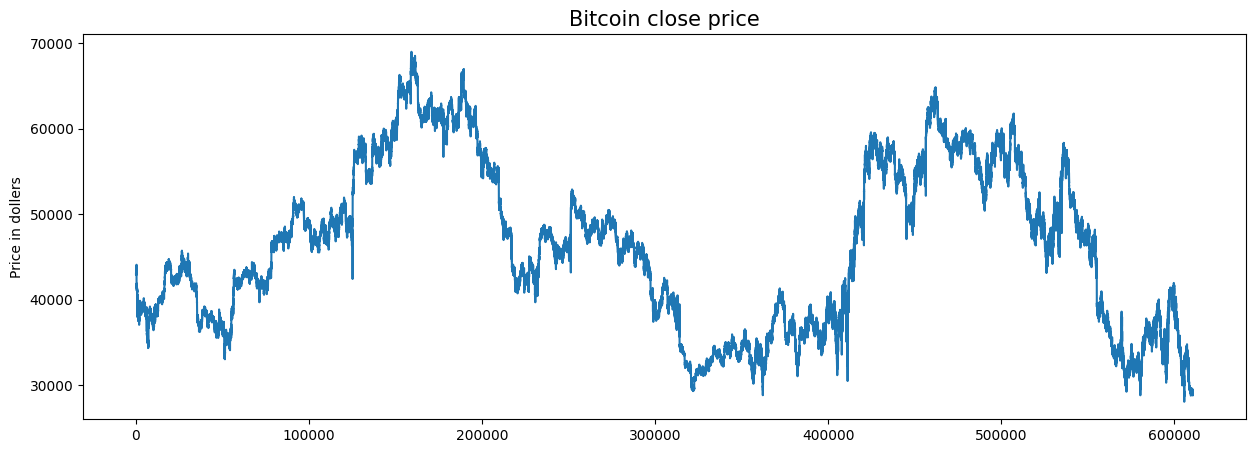

In [30]:
plt.figure(figsize=(15,5))
plt.plot(bs['close'])
plt.title('Bitcoin close price', fontsize=15)
plt.ylabel('Price in dollers')
plt.show()

In [31]:
bs=bs.drop(['unix'],axis=1)
bs

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,3.165254,138947.357197
1,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143
...,...,...,...,...,...,...,...,...
610777,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
610778,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
610779,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
610780,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279


<AxesSubplot:xlabel='low', ylabel='Density'>

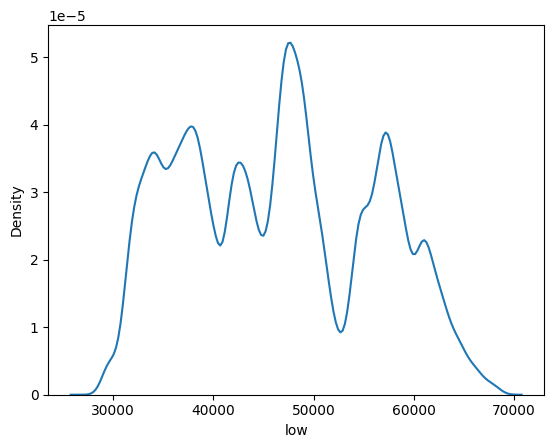

In [32]:
sns.kdeplot(bs['low'])

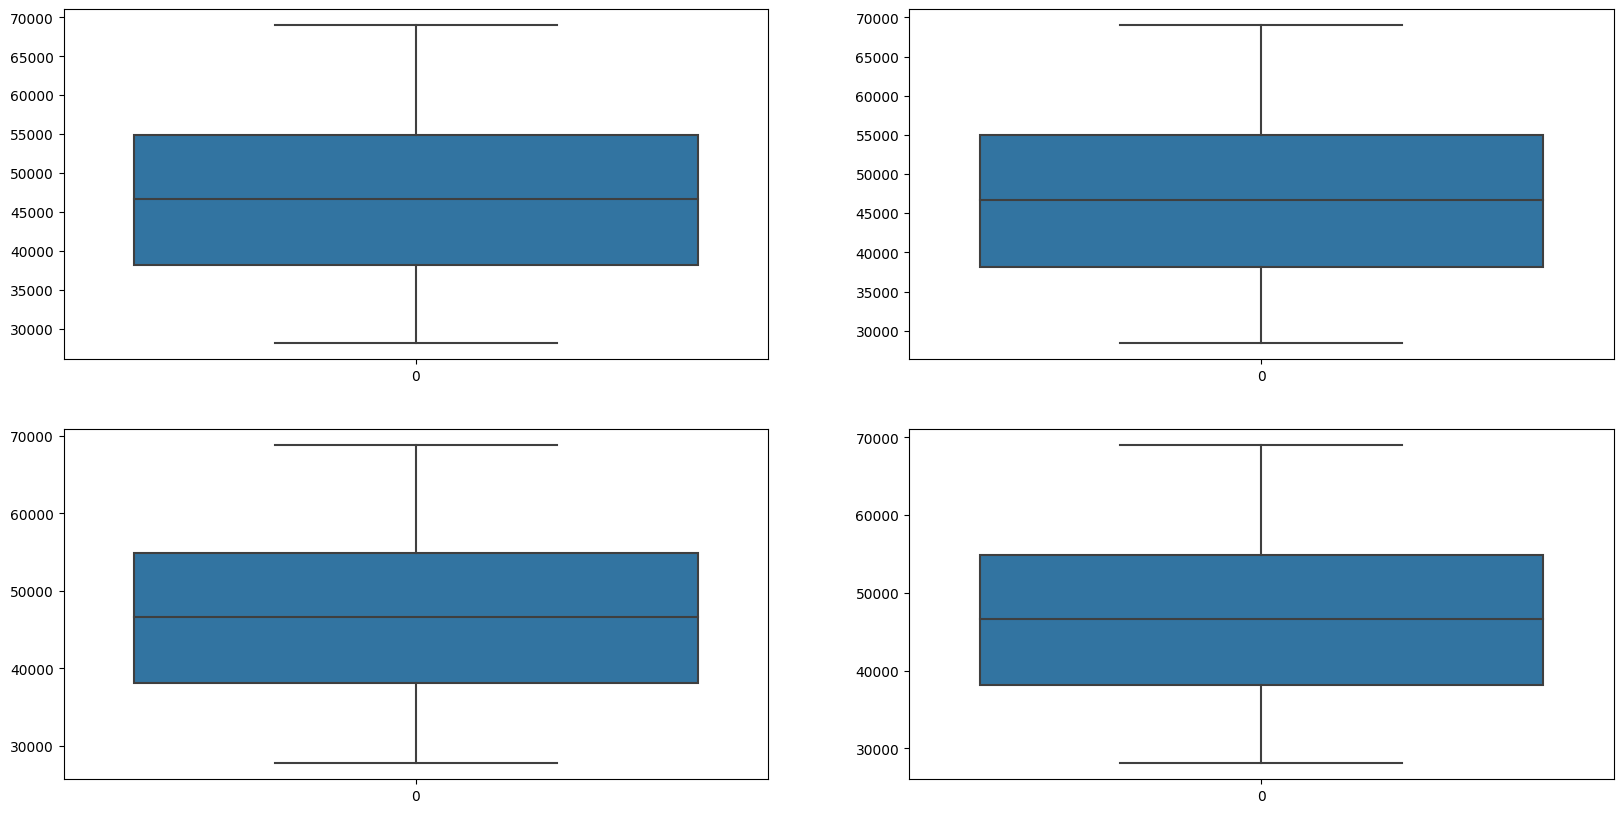

In [33]:
features=['open','high','low','close']
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(bs[col])
plt.show()

In [34]:
bs['Dates'] = pd.to_datetime(bs['date']).dt.date
bs['Time'] = pd.to_datetime(bs['date']).dt.time
bs.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD,Dates,Time
0,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,3.165254,138947.357197,2022-03-01,03:43:00
1,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021,2022-03-01,03:41:00
2,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957,2022-03-01,03:40:00
3,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268,2022-03-01,03:39:00
4,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143,2022-03-01,03:38:00


In [35]:
bs['year'] = pd.DatetimeIndex(bs['Dates']).year
bs['month'] = pd.DatetimeIndex(bs['Dates']).month
bs.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD,Dates,Time,year,month
0,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,3.165254,138947.357197,2022-03-01,03:43:00,2022,3
1,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021,2022-03-01,03:41:00,2022,3
2,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957,2022-03-01,03:40:00,2022,3
3,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268,2022-03-01,03:39:00,2022,3
4,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143,2022-03-01,03:38:00,2022,3


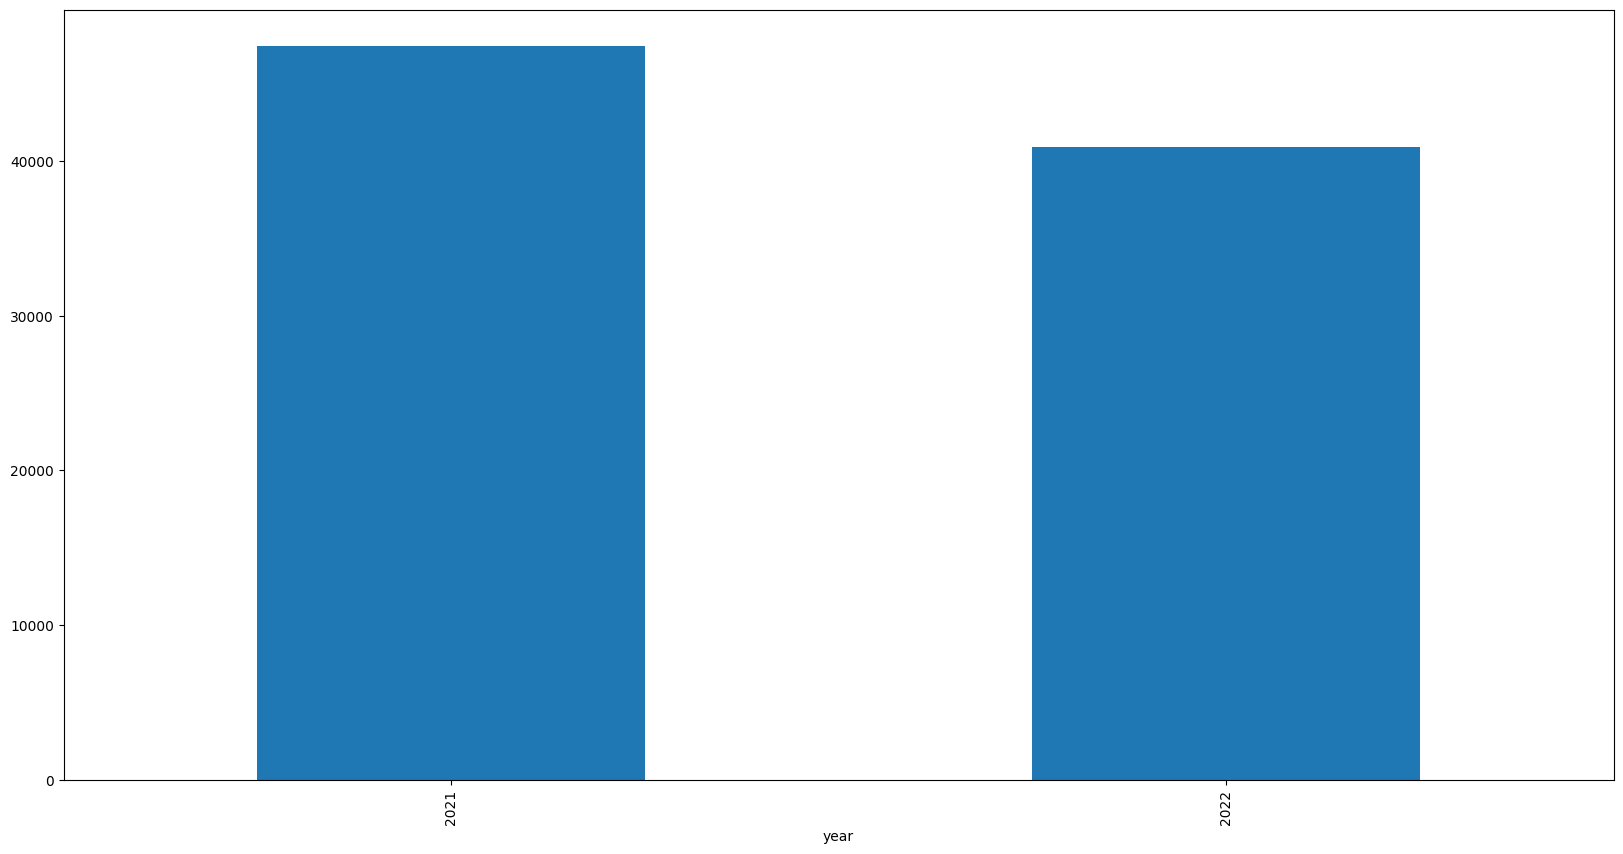

In [36]:
data_grouped = bs.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
   
    data_grouped[col].plot.bar()
plt.show()

In [37]:
bs['open-close']=bs['open']-bs['close']
bs['low-high']=bs['low']-bs['high']
bs['target']=np.where(bs['close'].shift(-1)>bs['close'],1,0)
bs.head()


,date,symbol,open,high,low,close,Volume BTC,Volume USD,Dates,Time,year,month,open-close,low-high,target
0,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,3.165254,138947.357197,2022-03-01,03:43:00,2022,3,0.00,0.00,0
1,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021,2022-03-01,03:41:00,2022,3,-28.35,-28.36,0
2,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957,2022-03-01,03:40:00,2022,3,6.21,-6.21,0
3,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268,2022-03-01,03:39:00,2022,3,35.72,-35.72,1
4,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143,2022-03-01,03:38:00,2022,3,28.36,-28.36,1


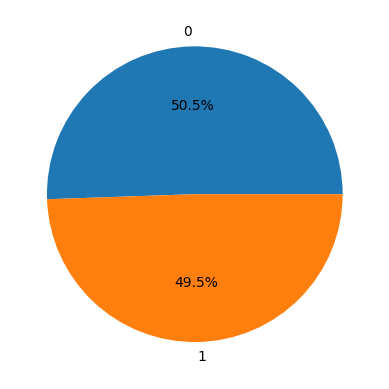

In [38]:
plt.pie(bs['target'].value_counts().values, labels=[0,1], autopct='%1.1f%%')
plt.show()

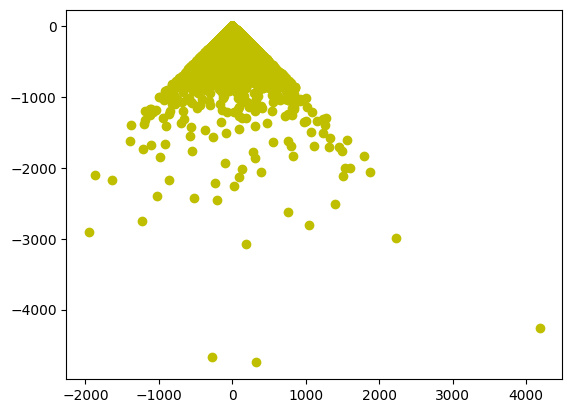

In [39]:
plt.scatter(bs['open-close'],bs['low-high'],c='y')
plt.show()


<AxesSubplot:ylabel='Frequency'>

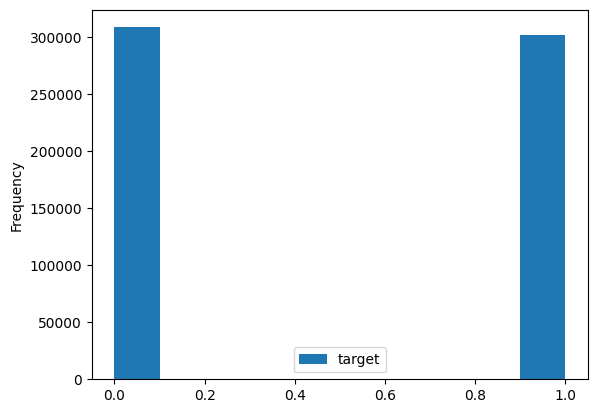

In [40]:
bs.plot( x='Volume USD', y='target', kind='hist')


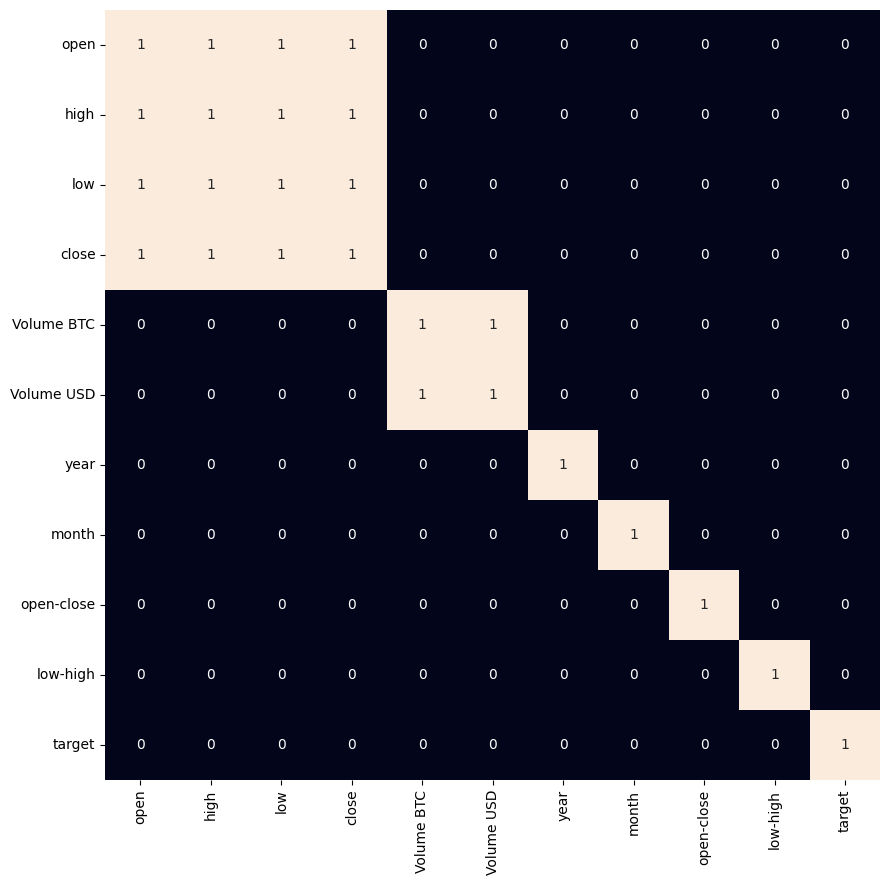

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(bs.corr()>0.9, annot=True, cbar=False)
plt.show()


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
X=bs[['open-close','low-high']]
Y=bs['target']

In [44]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
bs.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD,Dates,Time,year,month,open-close,low-high,target
0,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,3.165254,138947.357197,2022-03-01,03:43:00,2022,3,0.00,0.00,0
1,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021,2022-03-01,03:41:00,2022,3,-28.35,-28.36,0
2,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957,2022-03-01,03:40:00,2022,3,6.21,-6.21,0
3,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268,2022-03-01,03:39:00,2022,3,35.72,-35.72,1
4,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143,2022-03-01,03:38:00,2022,3,28.36,-28.36,1


# Model Implementation

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2021)


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [47]:
X_train

array([[-0.22813361,  0.38664325],
       [-0.68893551, -0.04980973],
       [-0.4393655 ,  0.5026131 ],
       ...,
       [-0.22571422,  0.61892156],
       [ 0.96723414,  0.06819171],
       [ 0.11877056,  0.63652866]])

In [48]:
X_test

array([[-0.30294878,  0.35092115],
       [-0.00834079,  0.19398092],
       [-0.01578508,  0.8466288 ],
       ...,
       [ 0.43180319,  0.39781699],
       [-0.2203171 , -0.35048486],
       [ 0.00208123,  0.11678054]])

In [49]:
Y_train

204914    0
107712    0
25675     0
552145    0
565838    0
         ..
423980    1
133741    0
476288    0
224597    1
91252     1
Name: target, Length: 427547, dtype: int32

In [50]:
Y_test

605253    0
277510    1
88836     1
489411    1
137498    0
         ..
344181    1
579540    1
575507    1
447447    0
600134    1
Name: target, Length: 183235, dtype: int32

In [51]:
print(X_train.shape)

(427547, 2)


In [52]:
print(X_test.shape)

(183235, 2)


# Linear Regression

In [61]:
model=LinearRegression()
model.fit(X_train,Y_train)
predicted_train_model=(model.predict(X_train))
predicted_test_model=(model.predict(X_test))
model


LinearRegression()

## Random Forest

In [54]:
regressor=RandomForestRegressor(random_state=0,
                                n_estimators=100,
                                max_depth=5,
                                min_samples_split=4,
                                bootstrap=True)
regressor.fit(X_train,Y_train)
predicted_train_regressor=(regressor.predict(X_train))
predicted_test_regressor=(regressor.predict(X_test))


RandomForestRegressor(max_depth=5, min_samples_split=4, random_state=0)

## Decision Tree

In [60]:
tree=DecisionTreeRegressor(random_state=0
                            )
tree.fit(X_train,Y_train)
predicted_train_tree=(tree.predict(X_train))
predicted_test_tree=(tree.predict(X_test))
tree


DecisionTreeRegressor(random_state=0)

# Model Evaluation

In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## For Linear regression

In [63]:
print(" Training DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_train,predicted_train_model))
print(" Mean squared error :     ",mean_squared_error(Y_train,predicted_train_model))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_train,predicted_train_model)))


 Training DataSet 
 Mean absolute error :     0.37424266954119983
 Mean squared error :      0.16969508576005138
 Root mean squared error:  0.4119406337811935


In [64]:
print(" Testing DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_test,predicted_test_model))
print(" Mean squared error :     ",mean_squared_error(Y_test,predicted_test_model))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_test,predicted_test_model)))


 Testing DataSet 
 Mean absolute error :     0.374233989170023
 Mean squared error :      0.16975174108900593
 Root mean squared error:  0.4120093944183869


## For Randomforest

In [57]:
print(" Training DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_train,predicted_train_regressor))
print(" Mean squared error :     ",mean_squared_error(Y_train,predicted_train_regressor))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_train,predicted_train_regressor)))


 Training DataSet 
 Mean absolute error :     0.2209647653071944
 Mean squared error :      0.1103901538214079
 Root mean squared error:  0.3322501374287269


In [58]:
print(" Testing DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_test,predicted_test_regressor))
print(" Mean squared error :     ",mean_squared_error(Y_test,predicted_test_regressor))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_test,predicted_test_regressor)))


 Testing DataSet 
 Mean absolute error :     0.22079892212130936
 Mean squared error :      0.11039704146428699
 Root mean squared error:  0.3322605024138244


## For DecisionTree

In [65]:
print(" Training DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_train,predicted_train_tree))
print(" Mean squared error :     ",mean_squared_error(Y_train,predicted_train_tree))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_train,predicted_train_tree)))


 Training DataSet 
 Mean absolute error :     0.043450241466681194
 Mean squared error :      0.021725120733340604
 Root mean squared error:  0.14739443928907428


In [66]:
print(" Testing DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_test,predicted_test_tree))
print(" Mean squared error :     ",mean_squared_error(Y_test,predicted_test_tree))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_test,predicted_test_tree)))


 Testing DataSet 
 Mean absolute error :     0.22292931547366834
 Mean squared error :      0.20168473691217903
 Root mean squared error:  0.4490932385509484


# Overfitting and Cross-validation

In [67]:
print(" Accuracy on training data set")
print(" Accuracy on Linear Regressor training data set :         ",model.score(X_train,Y_train))
print(" Accuracy on Random Forest Regressor training data set : ",regressor.score(X_train,Y_train))
acc_rr_train  = model.score(X_train,Y_train)
acc_rfr_train = regressor.score(X_train,Y_train)

 Accuracy on training data set
 Accuracy on Linear Regressor training data set :          0.32114601691671374
 Accuracy on Random Forest Regressor training data set :  0.5583914803472697


In [68]:
print(" Accuracy on test data set")
print(" Accuracy on Linear Regressor test data set :         ",model.score(X_test,Y_test))
print(" Accuracy on Random Forest Regressor test data set : ",regressor.score(X_test,Y_test))
acc_rr_test=model.score(X_test,Y_test)
acc_rfr_test=regressor.score(X_test,Y_test)

 Accuracy on test data set
 Accuracy on Linear Regressor test data set :          0.3208982300859782
 Accuracy on Random Forest Regressor test data set :  0.558350177908576


In [69]:
if acc_rr_train > acc_rr_test:
    print('LINEAR REGRESSION MODEL IS NOT OVERFITTED!')
else:
    print( 'LINEAR REGRESSION MODEL IS OVERFITTED')

LINEAR REGRESSION MODEL IS NOT OVERFITTED!


In [70]:
if acc_rfr_train > acc_rfr_test:
    print('RANDOMFOREST REGRESSOR MODEL IS NOT OVERFITTED!')
else:
    print( 'RANDOMFOREST REGRESSOR MODEL IS OVERFITTED')

RANDOMFOREST REGRESSOR MODEL IS NOT OVERFITTED!
